In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [26]:
n = 32  # 0, 1, ...., n-1, n

z = np.ones(n-1)
data = [-1*z, 2*z, -1*z]
h = 1/n
A = sp.sparse.diags_array(data, offsets=[-1, 0, 1],
                          shape=(n-1, n-1), format='csr')
A *= (1/h**2)

In [42]:
def uexact(x, k=6):
    return np.sin(k * np.pi * x)
def f(x, k=6):
    return ((k*np.pi)**2) * uexact(x, k)

In [43]:
x = np.linspace(0, 1, n+1)
U = uexact(x[1:-1])
F = f(x[1:-1])
u = sp.sparse.linalg.spsolve(A, F)

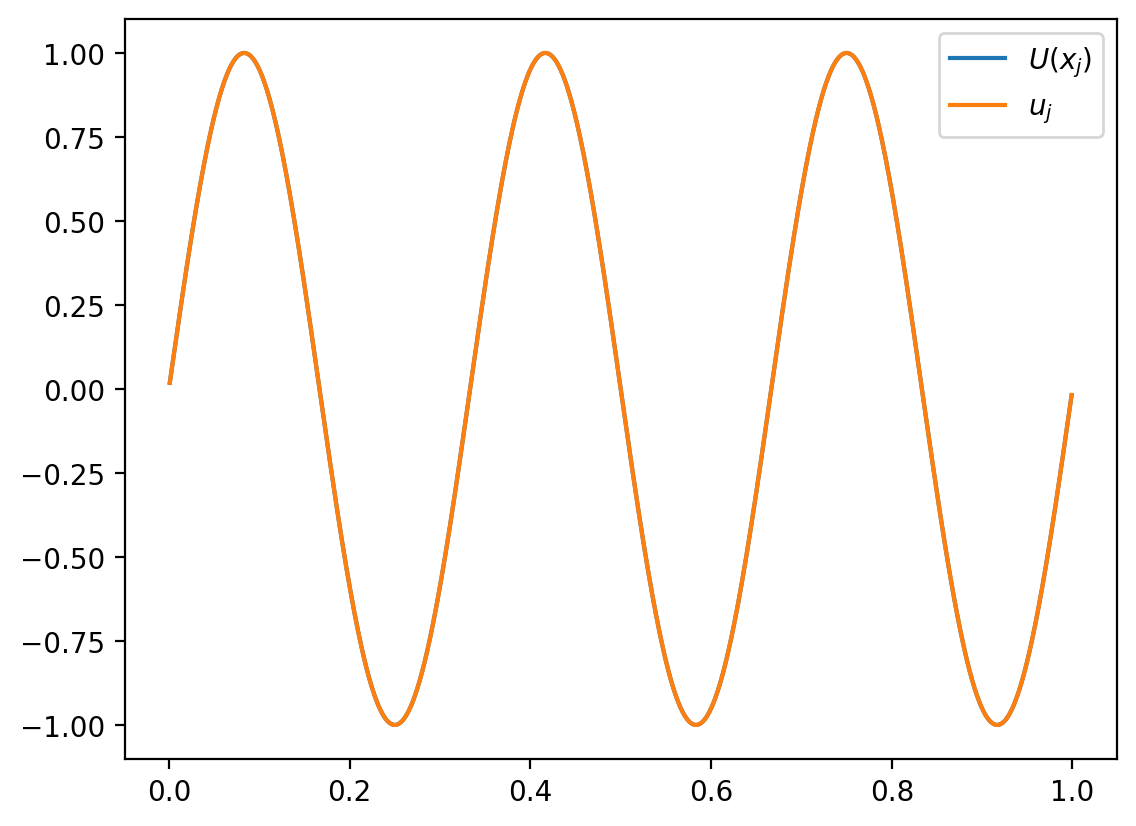

In [44]:
fig, ax = plt.subplots()
ax.plot(x[1:-1], U, label='$U(x_j)$')
ax.plot(x[1:-1], u, label='$u_j$')
plt.legend()

In [14]:
def gnorm(u, h):
    return np.sqrt(h * np.sum(u**2))

test = False
if test:
    n = 100
    x, h = np.linspace(0, 1, n+1, retstep=True)
    np.testing.assert_almost_equal(h, 1/n)
    
    u = x*(1-x)
    np.testing.assert_almost_equal(gnorm(u, h)**2, 1/5-1/2+1/3)

In [45]:
print('Norm of A^-1: ', np.linalg.norm(np.linalg.inv(A.toarray())))
print('Truncation:   ', gnorm(A @ U - F, h))
print('Error:        ', gnorm(U-u, h))

Norm of A^-1:  0.10540938099632478
Truncation:    0.0070942000314667695
Error:         1.9967028926182637e-05


In [46]:
nlist = [8, 16, 32, 64, 128, 256, 512, 1024]
elist = []

for n in nlist:
    # copy from above
    # make A
    z = np.ones(n-1)
    data = [-1*z, 2*z, -1*z]
    h = 1/n
    A = sp.sparse.diags_array(data, offsets=[-1, 0, 1],
                              shape=(n-1, n-1), format='csr')
    A *= (1/h**2)
    # make F
    # make U
    x = np.linspace(0, 1, n+1)
    U = uexact(x[1:-1])
    F = f(x[1:-1])
    # solve for u
    u = sp.sparse.linalg.spsolve(A, F)
    # store ||U-u|| in elist
    error = gnorm(U-u,h)
    elist.append(error)

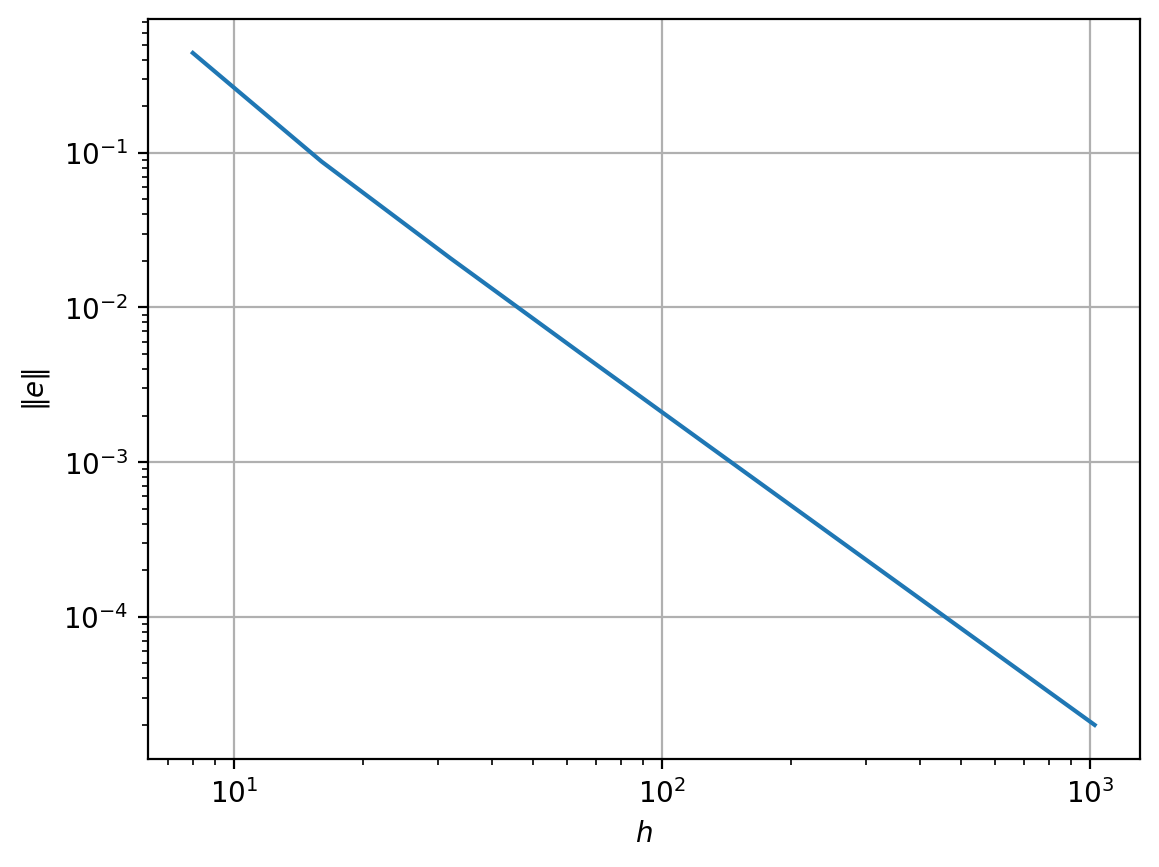

In [47]:
nlist = np.array(nlist)
elist = np.array(elist)
fig, ax = plt.subplots()
ax.loglog(nlist, elist, label='error')
ax.set_xlabel('$h$')
ax.set_ylabel(r'$\|e\|$')
ax.grid(True)

In [35]:
0.002276151583978705/0.0005682152262925766

4.0057912541870255